# Overview

#### This project focuses on analyzing and comparing the click-through rates (CTR) of two products, Product A and Product B, using various statistical methods. The goal is to determine which product performs better in terms of user engagement and to provide actionable insights based on the analysis.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import beta , chi2_contingency

# Data Understanding

In [2]:
clicks = pd.read_csv("/kaggle/input/ab-test-of-online-advertising/clicks.csv")
clicks.head(10)

,product,banner_clicked
0,A,0
1,B,0
2,A,0
3,B,0
4,A,0
5,A,0
6,B,0
7,A,0
8,B,0
9,A,0


In [3]:
clicks.shape

(10000, 2)

In [4]:
clicks.sample(5)

,product,banner_clicked
3175,A,1
9048,B,0
7498,A,0
8395,B,0
1957,A,0


In [5]:
clicks["product"].value_counts()

product
A    5028
B    4972
Name: count, dtype: int64

In [6]:
clicks["banner_clicked"].value_counts()

banner_clicked
0    8766
1    1234
Name: count, dtype: int64

In [7]:
clicks.isnull().sum()

product           0
banner_clicked    0
dtype: int64

In [8]:
clicks.describe()

,banner_clicked
count,10000.000000
mean,0.123400
std,0.328912
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# Data Exploration (EDA)

In [9]:
clicks.head()

,product,banner_clicked
0,A,0
1,B,0
2,A,0
3,B,0
4,A,0


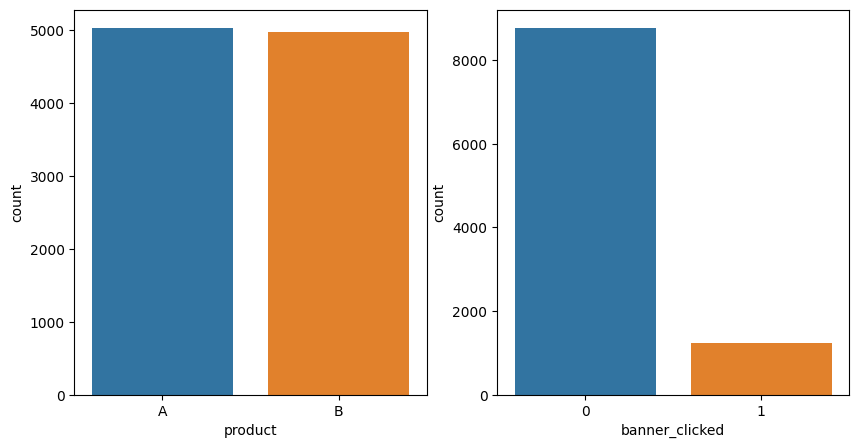

In [10]:
plt.figure(figsize = [10 , 5])

plt.subplot(1 , 2 , 1)
sb.countplot(data = clicks , x = "product")

plt.subplot(1 , 2 , 2)
sb.countplot(data = clicks , x = "banner_clicked");

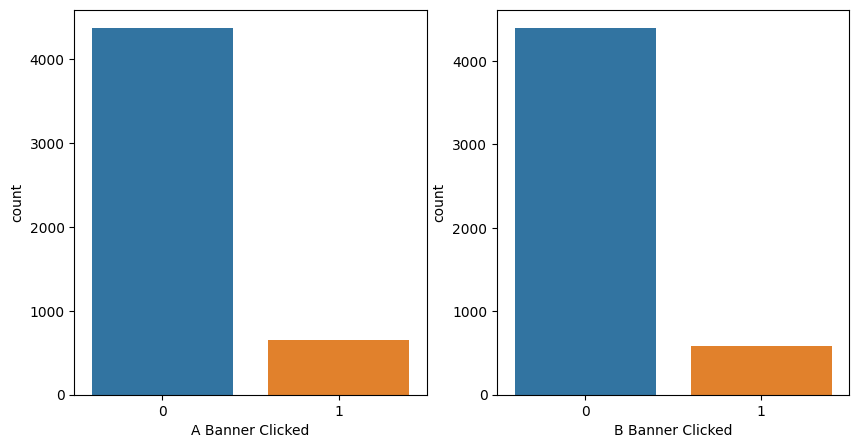

In [11]:
A_clicks = clicks[clicks["product"] == "A"]
B_clicks = clicks[clicks["product"] == "B"]

plt.figure(figsize = [10 , 5])

plt.subplot(1 , 2 , 1)
sb.countplot(data = A_clicks , x = "banner_clicked")
plt.xlabel("A Banner Clicked")

plt.subplot(1 , 2 , 2)
sb.countplot(data = B_clicks , x = "banner_clicked")
plt.xlabel("B Banner Clicked");

In [12]:
print(A_clicks["banner_clicked"].value_counts())
print(B_clicks["banner_clicked"].value_counts())

banner_clicked
0    4374
1     654
Name: count, dtype: int64
banner_clicked
0    4392
1     580
Name: count, dtype: int64


## CTR Calculation

In [13]:
A_ctr = A_clicks["banner_clicked"].mean() 
B_ctr = B_clicks["banner_clicked"].mean()

In [14]:
print(f"CTR for Product A: {A_ctr:.2%}")
print(f"CTR for Product B: {B_ctr:.2%}")

CTR for Product A: 13.01%
CTR for Product B: 11.67%


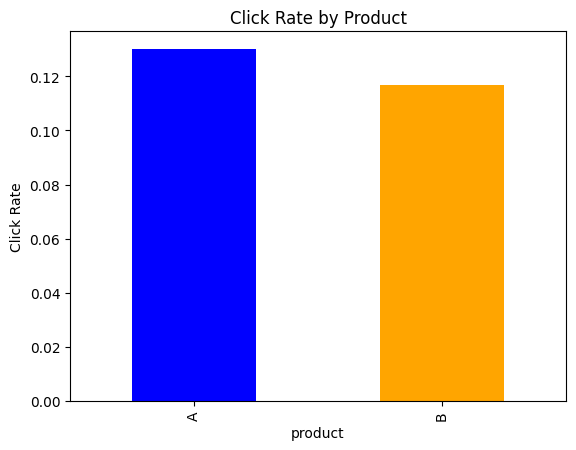

In [15]:
click_rates = clicks.groupby('product')['banner_clicked'].mean()
click_rates.plot(kind='bar', color=['blue', 'orange'])
plt.ylabel('Click Rate')
plt.title('Click Rate by Product')
plt.show()

## Bayesian Analysis

In [16]:
n_clicks_a = A_clicks['banner_clicked'].sum()
n_total_a = len(A_clicks)

n_clicks_b = B_clicks['banner_clicked'].sum()
n_total_b = len(B_clicks)

In [17]:
alpha_prior = 1
beta_prior = 5

In [18]:
alpha_post_a = alpha_prior + n_clicks_a
beta_post_a = beta_prior + n_total_a - n_clicks_a

In [19]:
alpha_post_b = alpha_prior + n_clicks_b
beta_post_b = beta_prior + n_total_b - n_clicks_b

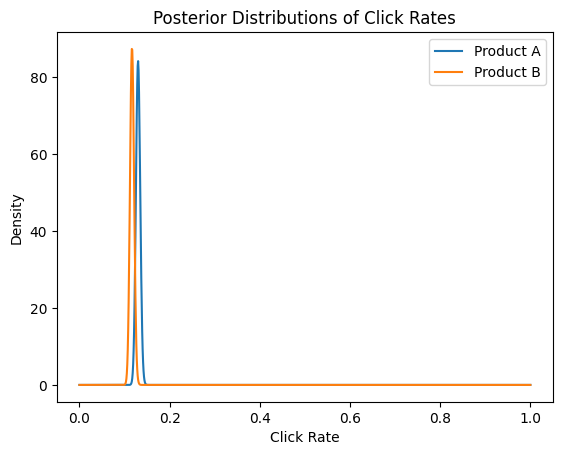

Probability that Product A is better than Product B: 97.95%


In [20]:
samples_a = np.random.beta(alpha_post_a, beta_post_a, 100000)
samples_b = np.random.beta(alpha_post_b, beta_post_b, 100000)

prob_a_better_than_b = np.mean(samples_a > samples_b)

x = np.linspace(0, 1, 1000)
y_a = beta.pdf(x, alpha_post_a, beta_post_a)
y_b = beta.pdf(x, alpha_post_b, beta_post_b)


plt.plot(x, y_a, label='Product A')
plt.plot(x, y_b, label='Product B')
plt.title('Posterior Distributions of Click Rates')
plt.xlabel('Click Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

print(f"Probability that Product A is better than Product B: {prob_a_better_than_b:.2%}")

In [21]:
clicks_df = clicks[clicks['banner_clicked'] == 1]
non_clicks_df = clicks[clicks['banner_clicked'] == 0]

# Example: Distribution of clicks by product
clicks_distribution = clicks_df['product'].value_counts(normalize=True)
non_clicks_distribution = non_clicks_df['product'].value_counts(normalize=True)

print("Click Distribution by Product:")
print(clicks_distribution)

print("Non-Click Distribution by Product:")
print(non_clicks_distribution)

Click Distribution by Product:
product
A    0.529984
B    0.470016
Name: proportion, dtype: float64
Non-Click Distribution by Product:
product
B    0.501027
A    0.498973
Name: proportion, dtype: float64


## Chi - Square Test

In [22]:
contingency_table = pd.crosstab(clicks['product'], clicks['banner_clicked'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test p-value: {p_value:.4f}")

Chi-Square Test p-value: 0.0445
